In [49]:
# importing the dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
# reading the dataset
data = pd.read_csv('spam.csv', encoding='latin-1')

In [51]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
v1            5572 non-null object
v2            5572 non-null object
Unnamed: 2    50 non-null object
Unnamed: 3    12 non-null object
Unnamed: 4    6 non-null object
dtypes: object(5)
memory usage: 217.8+ KB


In [53]:
Null_Columns = data.columns[data.isnull().any()]

In [54]:
Total_Sum_Of_Values_In_Null_Columns = data[Null_Columns].isnull().sum()
Total_Sum_Of_Values_In_Null_Columns

Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [55]:
data = data.drop(Null_Columns,axis=1)  #Whether to drop labels from the index (0 or ‘index’) or columns (1 or ‘columns’).

In [56]:
len(data['v2'].unique())

5169

In [57]:
data['v1']

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: v1, Length: 5572, dtype: object

In [58]:
data.drop_duplicates(subset =["v1","v2"],keep = 'first', inplace = True) 

In [59]:
data.shape

(5169, 2)

In [60]:
data = data.rename(columns={'v1': 'class', 'v2': 'text'})

In [61]:
data['class'].value_counts()

ham     4516
spam     653
Name: class, dtype: int64

In [62]:
spam_data_count = data['class'].value_counts()[1]
nonspam_data_count = data['class'].value_counts()[0]
total_data_count = data['class'].value_counts().sum()


In [63]:
print('Percentage of spam messages in data is : {:.2f} %'.format((spam_data_count/total_data_count)*100))
print('Percentage of Non spam messages in data is : {:.2f} %'.format((nonspam_data_count/total_data_count)*100))

Percentage of spam messages in data is : 12.63 %
Percentage of Non spam messages in data is : 87.37 %


Text(0, 0.5, 'Frequency')

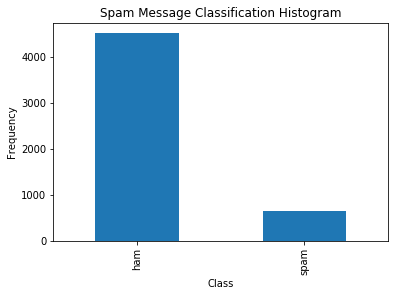

In [64]:
data['class'].value_counts().plot(kind = 'bar')
plt.title("Spam Message Classification Histogram")
plt.xlabel("Class")
plt.ylabel("Frequency")

In [65]:
def convertClass(classes):
    if(classes=='spam'):
        return 1
    else:
        return 0
data['class'] = data['class'].apply(convertClass)

In [66]:
data.head()

,class,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [67]:
X = data['text']
y = data['class']
from sklearn.model_selection import train_test_split
# splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [68]:
print(X_train.shape,y_train.shape)

(3618,) (3618,)


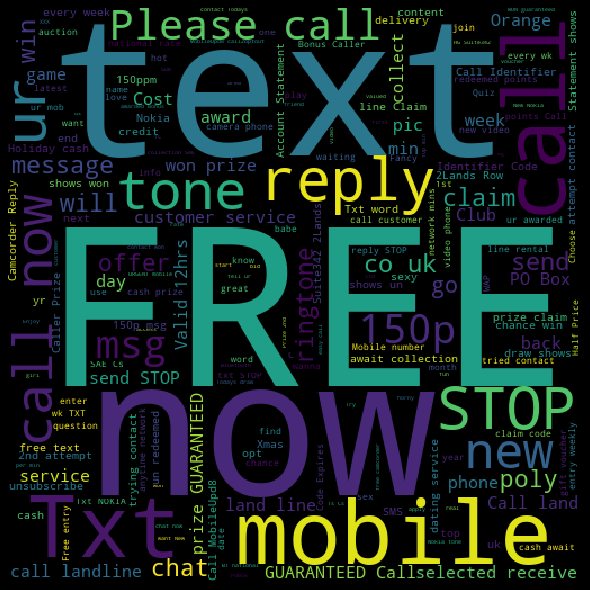

In [69]:
from wordcloud import WordCloud
spam_words= ''.join(list(data[data['class']==1]['text']))
plt.figure(figsize=(10,8), facecolor='k')
spam_word_cloud = WordCloud(width=512, height=512).generate(spam_words)
plt.imshow(spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

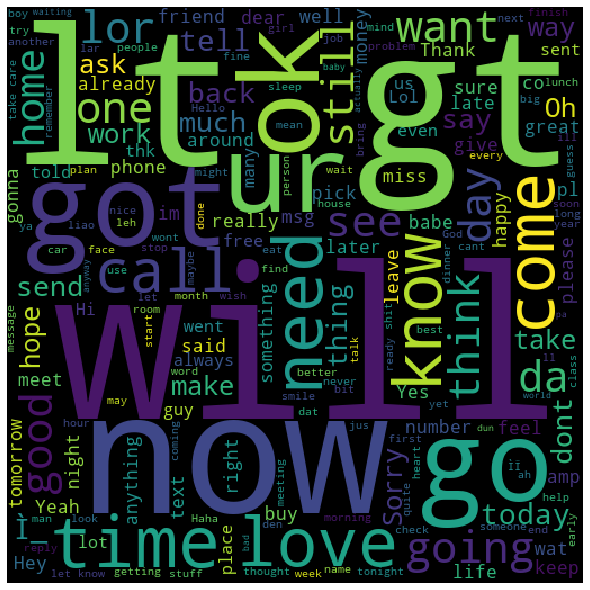

In [70]:
non_spam_words= ''.join(list(data[data['class']==0]['text']))
plt.figure(figsize=(10,8), facecolor='white')
spam_word_cloud = WordCloud(width=512, height=512).generate(non_spam_words)
plt.imshow(spam_word_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [71]:
spam_data = data[data['class']==1]#data.class not working
non_spam_data = data[data['class']==0]

spam_data_mean = spam_data['text'].str.len().mean()
non_spam_data_mean = non_spam_data['text'].str.len().mean()

print('Average length of document/message for spam messgae : {}'.format(spam_data_mean))
print('Average length of document/message for non spam messgae : {}'.format(non_spam_data_mean))

Average length of document/message for spam messgae : 137.89127105666157
Average length of document/message for non spam messgae : 70.45925597874225


Text(0, 0.5, 'Average length')

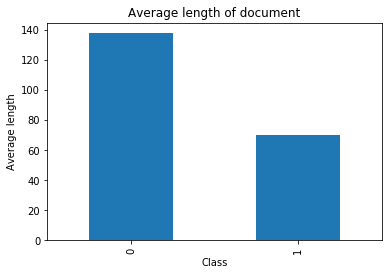

In [72]:
Combine_Doc_Length = pd.DataFrame([spam_data_mean,non_spam_data_mean])
Combine_Doc_Length.plot(kind='bar',legend=False)
plt.title("Average length of document")
plt.xlabel("Class")
plt.ylabel("Average length")

In [73]:
spam_avg_digits_per_doc = spam_data['text'].str.count(r'\d').mean()
not_spam_avg_digits_per_doc = non_spam_data['text'].str.count(r'\d').mean()
print('Average no. of digits per document for spam :',spam_avg_digits_per_doc)
print('Average no. of digits per document for not spam :',not_spam_avg_digits_per_doc)

Average no. of digits per document for spam : 15.447166921898928
Average no. of digits per document for not spam : 0.29030115146147034


           0
0   0.290301
1  15.447167


Text(0.5, 1.0, 'Average number of digit per document')

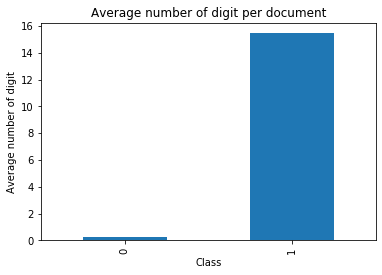

In [74]:
combine_digit_doc = pd.DataFrame([not_spam_avg_digits_per_doc,spam_avg_digits_per_doc])
print(combine_digit_doc)
combine_digit_doc.plot(kind='bar',legend=False)
plt.xlabel('Class')
plt.ylabel('Average number of digit')
plt.title('Average number of digit per document')

In [75]:
spam_avg_non_word_chars = spam_data['text'].str.count(r'[^a-zA-Z0-9-]+').mean()
not_spam_avg_non_word_chars = non_spam_data['text'].str.count(r'[^a-zA-Z0-9-]+').mean()

print('Average no. of non word per document for spam:',spam_avg_non_word_chars)
print('Average no. of non word per document for not spam:',not_spam_avg_non_word_chars)

Average no. of non word per document for spam: 24.396630934150078
Average no. of non word per document for not spam: 14.263064658990256


Text(0, 0.5, 'Average no. of non word chars')

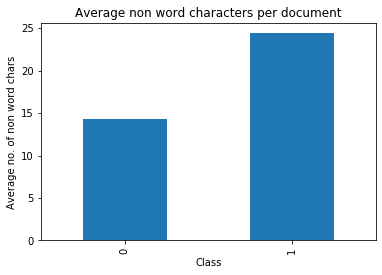

In [76]:
avg_doc_len = pd.DataFrame([not_spam_avg_non_word_chars, spam_avg_non_word_chars])
avg_doc_len.plot(kind = 'bar', legend=False)
plt.title("Average non word characters per document")
plt.xlabel("Class")
plt.ylabel("Average no. of non word chars")

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer
# create the transform
tfidf = TfidfVectorizer(min_df=1,stop_words='english')
print(X_train.head(2))
# tokenize and build vocab
tfidf.fit(X_train)
# encode the training data
idf = tfidf.idf_
X_train_cv = tfidf.transform(X_train)
X_test_cv = tfidf.transform(X_test)
tfidf_dict = dict(zip(tfidf.get_feature_names(), idf))
tfidf_df = pd.DataFrame.from_dict(tfidf_dict, orient='index').reset_index()
tfidf_df.columns=('token','idf')
tfidf_df = tfidf_df.sort_values(by='idf', ascending=False)
print(X_train.head(2))
print(X_train_cv.shape , X_test_cv.shape )

1757                  Miss ya, need ya, want ya, love ya.
1048    I walked an hour 2 c u! doesnåÕt that show I c...
Name: text, dtype: object
1757                  Miss ya, need ya, want ya, love ya.
1048    I walked an hour 2 c u! doesnåÕt that show I c...
Name: text, dtype: object
(3618, 6816) (1551, 6816)


In [79]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score

clfrNB = MultinomialNB(alpha=0.1)
clfrNB.fit(X_train_cv, y_train)
y_pred = clfrNB.predict(X_test_cv)
print(roc_auc_score(y_test, y_pred))

0.9492674680691209


In [80]:
# Plot non-normalized confusion matrix
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test,y_pred)
np.set_printoptions(precision=2)

In [81]:
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[1323    8]
 [  21  199]]


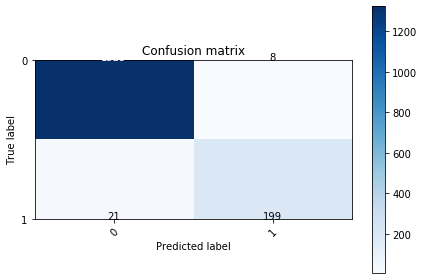

In [82]:
class_names = [0,1]
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, title='Confusion matrix')
plt.show()

In [83]:
from sklearn.metrics import recall_score

print(recall_score(y_test, y_pred))

0.9045454545454545


In [88]:
import sklearn
print(sklearn.__version__)

0.21.3
